In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [36]:
path= "/kaggle/input/uefa-euro-2024-players/euro2024_players.csv"

euro_df= pd.read_csv(path)

In [37]:
euro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [38]:
euro_df.describe()

,Age,Height,Caps,Goals,MarketValue
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


In [39]:
euro_df.sample(4)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
547,Giorgi Loria,Goalkeeper,38,Dinamo Tbilisi,197,right,77,0,50000,Georgia
214,Zan Zaletel,Centre-Back,24,Viborg FF,185,right,2,0,1200000,Slovenia
89,Granit Xhaka,Defensive Midfield,31,Bayer 04 Leverkusen,186,left,124,14,20000000,Switzerland
420,Wout Faes,Centre-Back,26,Leicester City,187,right,14,0,20000000,Belgium


In [40]:
euro_df.isna().sum()

Name           0
Position       0
Age            0
Club           0
Height         0
Foot           3
Caps           0
Goals          0
MarketValue    0
Country        0
dtype: int64

In [41]:
euro_df.replace("-","Unknown", inplace=True)

In [42]:
foot=euro_df.Foot
foots= foot.value_counts()
foots

Foot
right      436
left       150
both        31
Unknown      3
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x78ea3973b010>,
 [Text(-0.6555489675123424, 0.8833207521582984, 'right'),
  Text(0.4944167588271773, -0.9826250905563266, 'left'),
  Text(1.0807242777329122, -0.20502447541373076, 'both'),
  Text(1.0998729072139999, -0.01672088444502765, 'Unknown')],
 [Text(-0.35757216409764125, 0.4818113193590718, '70.3%'),
  Text(0.2696818684511876, -0.5359773221216326, '24.2%'),
  Text(0.5894859696724974, -0.11183153204385314, '5.0%'),
  Text(0.5999306766621817, -0.009120482424560535, '0.5%')])

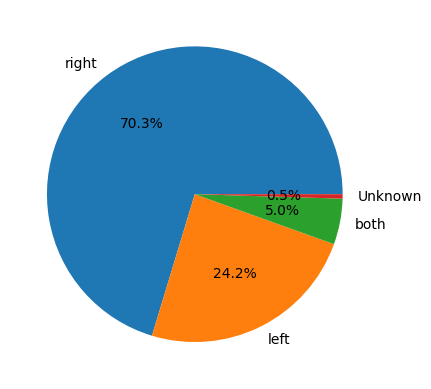

In [43]:
label=foots.index


plt.pie( foots, labels=label ,autopct='%1.1f%%')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Count'>

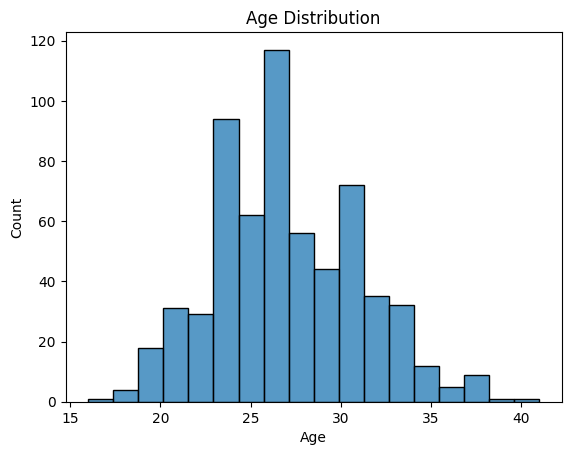

In [44]:
ages=euro_df["Age"]
plt.title("Age Distribution")
sns.histplot(ages)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Height Distribution'}, xlabel='Height', ylabel='Count'>

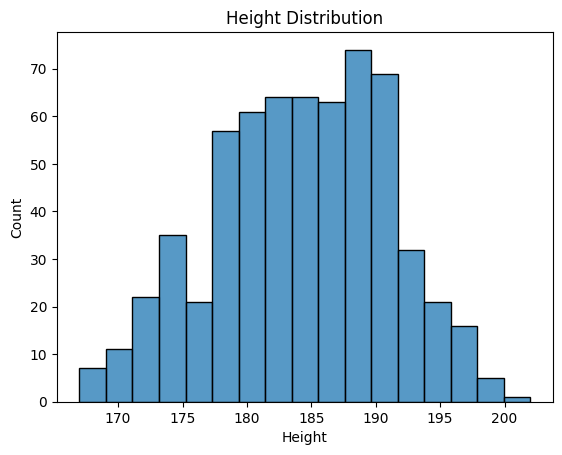

In [45]:
heights=euro_df["Height"]
plt.title("Height Distribution")
sns.histplot(heights)

In [46]:
clubs=euro_df["Club"].value_counts().head(10)
clubs

Club
Manchester City        13
Inter Milan            13
FC Barcelona           12
Real Madrid            12
Paris Saint-Germain    12
RB Leipzig             11
Bayern Munich          11
Bayer 04 Leverkusen    10
Arsenal FC             10
Liverpool FC            9
Name: count, dtype: int64

In [47]:
euro_df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


<Axes: xlabel='Position'>

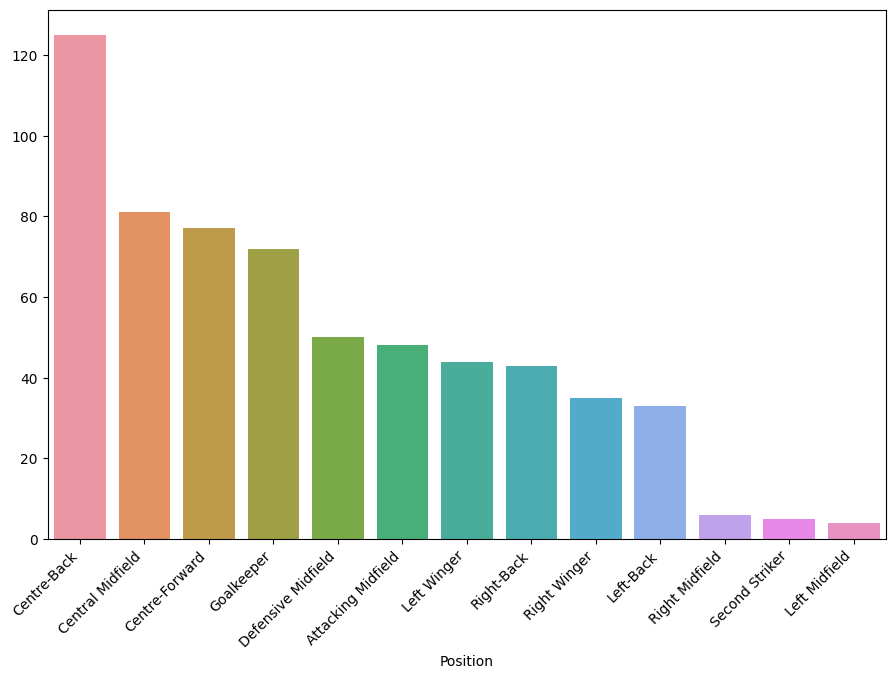

In [48]:
positions=euro_df["Position"].value_counts()
x=positions.index
y=positions.values

plt.figure(figsize=(9,6))
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
sns.barplot(x=x, y=y)

<Axes: title={'center': "Clubs' Players in Euro 24"}, ylabel='Club'>

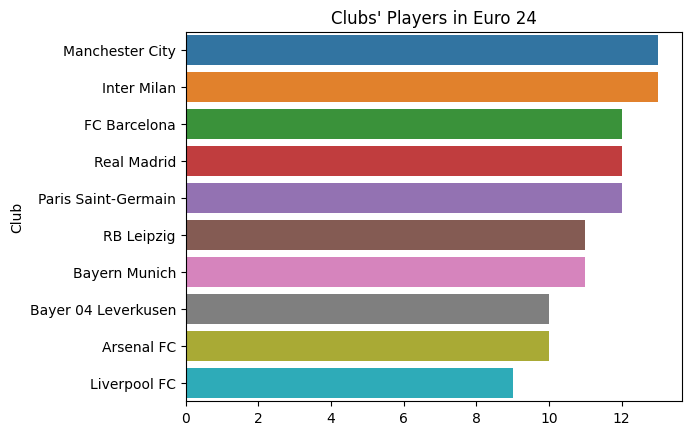

In [49]:
club=clubs.index
players=clubs.values

plt.title("Clubs' Players in Euro 24")
sns.barplot(x=players, y=club)


In [50]:
# Most valuable player/s
most_valuable= euro_df["MarketValue"].max()
euro_df.loc[euro_df["MarketValue"]==most_valuable]


,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
250,Jude Bellingham,Attacking Midfield,20,Real Madrid,186,right,29,3,180000000,England
411,Kylian Mbappé,Centre-Forward,25,Paris Saint-Germain,178,right,78,47,180000000,France


Text(0.5, 1.0, 'Top 10 Market values (million £)')

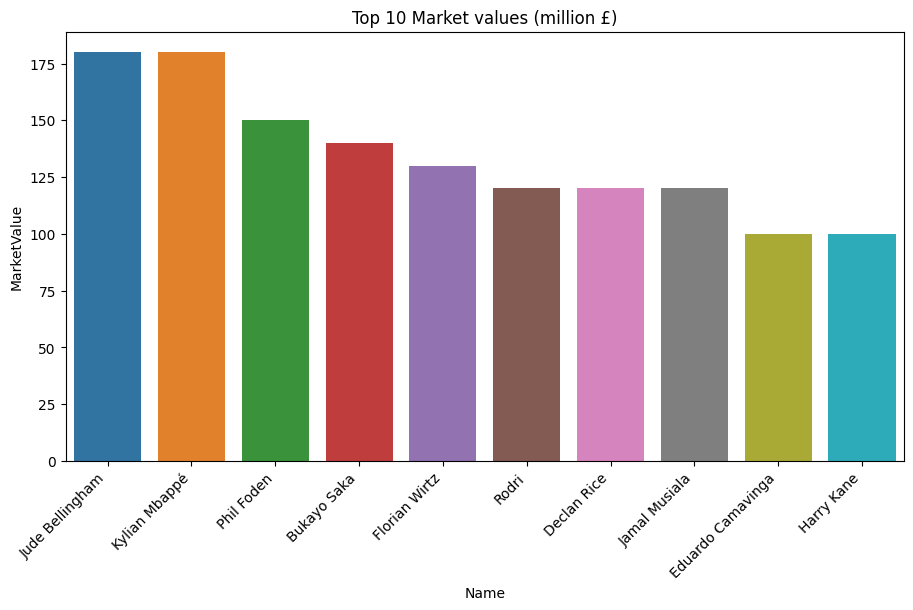

In [51]:
player_values= euro_df.sort_values(by="MarketValue",ascending=False).head(10)
player_names= player_values["Name"]
market_values = player_values["MarketValue"]/(10**6) #to make it million

plt.figure(figsize=(9, 5))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
sns.barplot(x=player_names,y=market_values)
plt.title("Top 10 Market values (million £)")

In [52]:
most_valuable_countries= euro_df.groupby("Country")["MarketValue"].sum().sort_values( ascending=False)

most_valuable_countries

Country
England           1515000000
France            1234000000
Portugal          1054500000
Spain              965500000
Germany            851000000
Netherlands        845000000
Italy              705500000
Belgium            584500000
Denmark            415500000
Ukraine            379000000
Croatia            327700000
Turkiye            324100000
Serbia             311800000
Switzerland        282000000
Austria            235500000
Poland             212400000
Scotland           207400000
Czech Republic     193900000
Hungary            164450000
Georgia            160150000
Slovakia           156700000
Slovenia           139500000
Albania            111600000
Romania             92125000
Name: MarketValue, dtype: int64

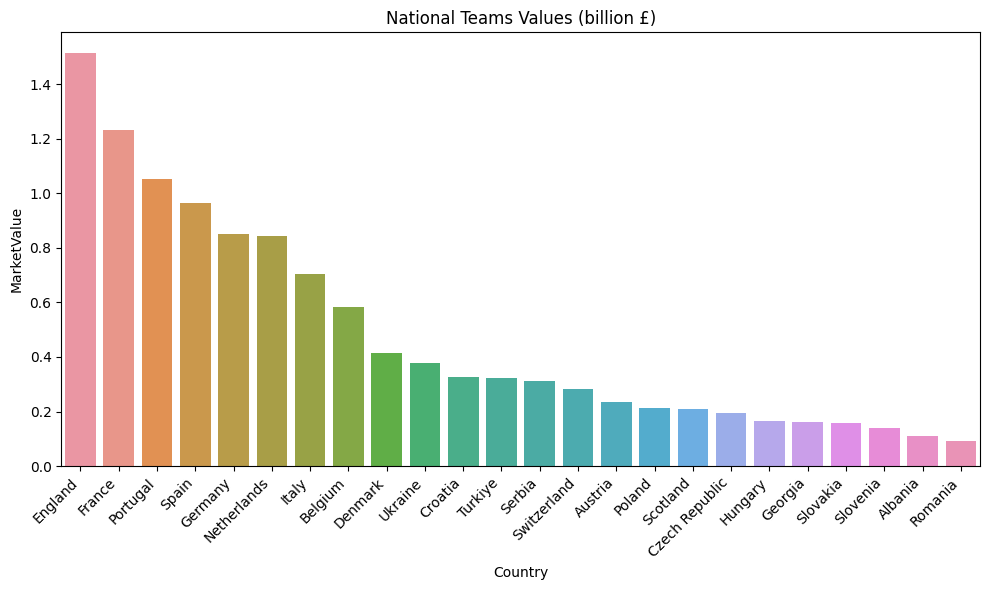

In [53]:
most_valuable_countries = most_valuable_countries.reset_index()
countries=most_valuable_countries.Country
values = most_valuable_countries["MarketValue"] / (10**9)

plt.figure(figsize=(10, 6))
sns.barplot(x=countries, y=values )
plt.xticks(rotation=45, ha='right')
plt.title("National Teams Values (billion £)")
plt.tight_layout()

plt.show()

In [54]:
countries_goals= euro_df.groupby("Country")["Goals"].sum().sort_values( ascending=False)

countries_goals.head()

Country
Portugal    225
France      192
Belgium     177
Poland      154
Croatia     147
Name: Goals, dtype: int64

<Axes: title={'center': 'Top 10 scorers'}, xlabel='Name', ylabel='Goals'>

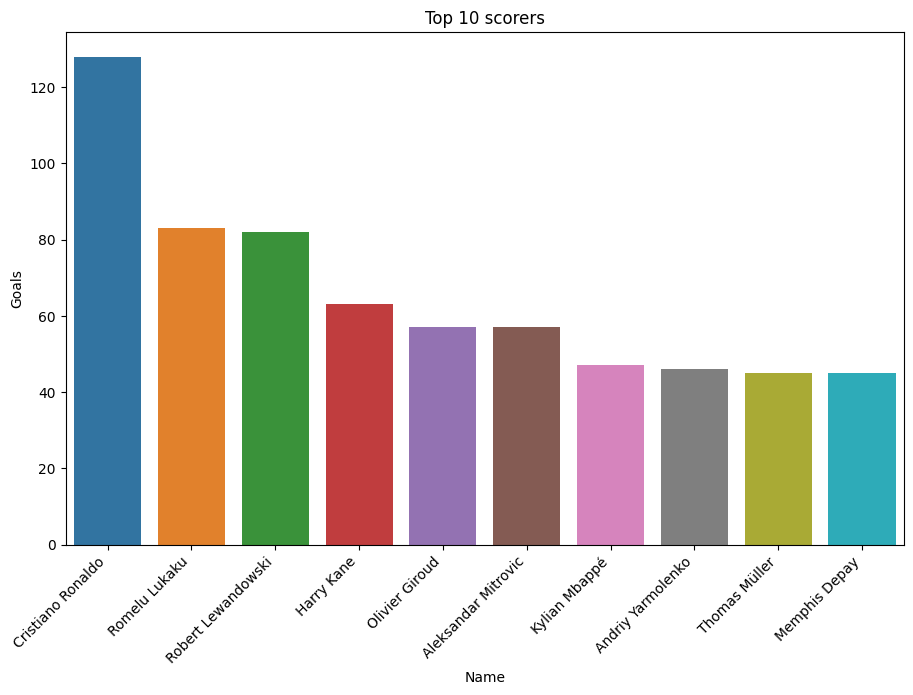

In [55]:
scorer_df=euro_df.sort_values(by="Goals", ascending=False).head(10)
names=scorer_df.Name
goals=scorer_df.Goals

plt.figure(figsize=(9,6))
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 scorers")
plt.tight_layout()
sns.barplot(x=names,y=goals)


In [56]:
countries_goals= euro_df.groupby("Country")["Goals"].sum().sort_values(ascending=False).reset_index()

countries_goals.head()

,Country,Goals
0,Portugal,225
1,France,192
2,Belgium,177
3,Poland,154
4,Croatia,147


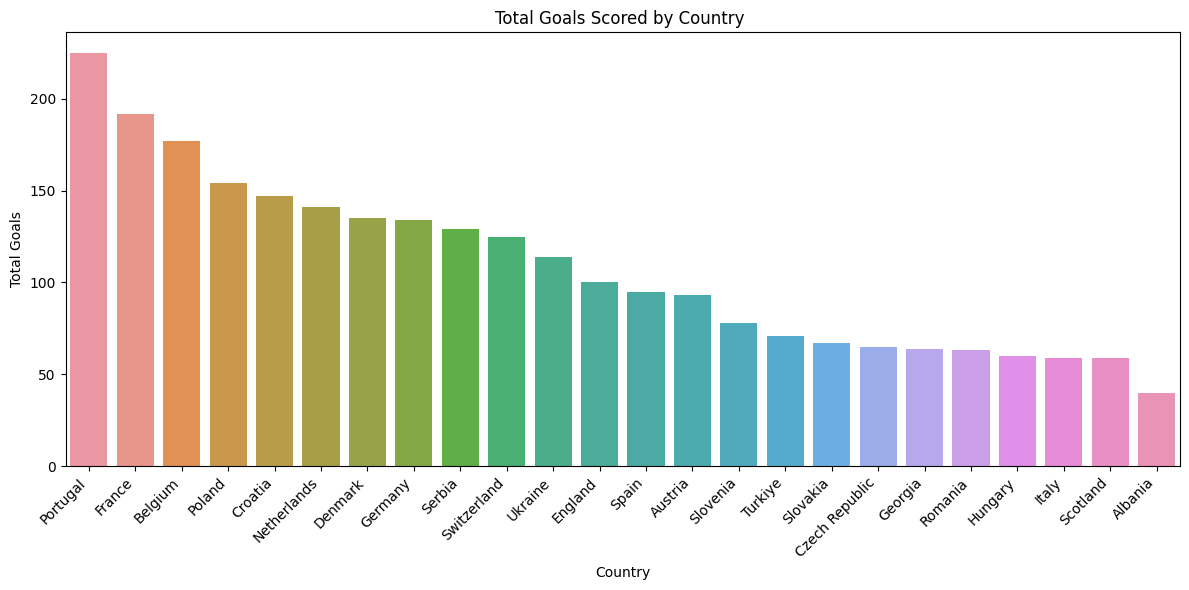

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Country", y="Goals", data=countries_goals)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored by Country ')
plt.tight_layout()
plt.show()